<a href="https://colab.research.google.com/github/rizkimuzakiii/project1/blob/main/deeplearning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

connect gdrive ke gcolab

In [12]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


instal dependensi

In [2]:
!pip install opencv-python keras tensorflow matplotlib scikit-learn


muat libraries

In [3]:
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array
from matplotlib import pyplot as plt


inisiasi file ke folder, dll

In [7]:
video_paths = [
    '/content/drive/MyDrive/deeplearning/file1.mp4',
    '/content/drive/MyDrive/deeplearning/file2.mp4'
]



ekstraksi frame video

In [8]:
def extract_frames(video_path, max_frames=30):
    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_count = 0
    while cap.isOpened() and frame_count < max_frames:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, (224, 224))  # Resize frames to 224x224
        frames.append(img_to_array(frame))
        frame_count += 1
    cap.release()
    return np.array(frames)

# Contoh: extract_frames('video.mp4')


preprocessing data

In [9]:
def load_data(video_dir, labels, max_frames=30):
    videos = []
    video_labels = []
    for video_file in os.listdir(video_dir):
        video_path = os.path.join(video_dir, video_file)
        frames = extract_frames(video_path, max_frames)
        videos.append(frames)
        video_labels.append(labels[video_file])  # label sesuai dengan video
    return np.array(videos), np.array(video_labels)

# Misal dataset berada di folder /dataset dan labels adalah dict video_name:label
videos, labels = load_data('/content/drive/MyDrive/deeplearning', {'file1.mp4': 1, 'file2.mp4': 0})
videos_train, videos_test, labels_train, labels_test = train_test_split(videos, labels, test_size=0.2)


build model (CNN + LSTM)

In [10]:
def build_model(input_shape):
    model = models.Sequential()

    # CNN part
    model.add(layers.TimeDistributed(layers.Conv2D(32, (3, 3), activation='relu'), input_shape=input_shape))
    model.add(layers.TimeDistributed(layers.MaxPooling2D((2, 2))))
    model.add(layers.TimeDistributed(layers.Conv2D(64, (3, 3), activation='relu')))
    model.add(layers.TimeDistributed(layers.MaxPooling2D((2, 2))))
    model.add(layers.TimeDistributed(layers.Conv2D(128, (3, 3), activation='relu')))
    model.add(layers.TimeDistributed(layers.MaxPooling2D((2, 2))))

    # LSTM part
    model.add(layers.TimeDistributed(layers.Flatten()))
    model.add(layers.LSTM(64, return_sequences=False))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

input_shape = (30, 224, 224, 3)  # 30 frames of 224x224 RGB images
model = build_model(input_shape)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


train model

In [11]:
history = model.fit(videos_train, labels_train, epochs=10, batch_size=2, validation_data=(videos_test, labels_test))


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 30s 30s/step - accuracy: 0.0000e+00 - loss: 0.8247 - val_accuracy: 0.0000e+00 - val_loss: 0.8017
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 1.0000 - loss: 0.6280 - val_accuracy: 0.0000e+00 - val_loss: 0.8972
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 1.0000 - loss: 0.5351 - val_accuracy: 0.0000e+00 - val_loss: 1.0275
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 1.0000 - loss: 0.4053 - val_accuracy: 0.0000e+00 - val_loss: 1.0903
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 1.0000 - loss: 0.3726 - val_accuracy: 0.0000e+00 - val_loss: 1.1959
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 1.0000 - loss: 0.2925 - val_accuracy: 0.0000e+00 - val_loss: 1.3433
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 1.0000 - loss: 0.2817 - val_accuracy: 0.0000e+00 - val_loss: 1.4371
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 1.0000 - loss: 0.2774 - val_accu

evaluasi n hasil

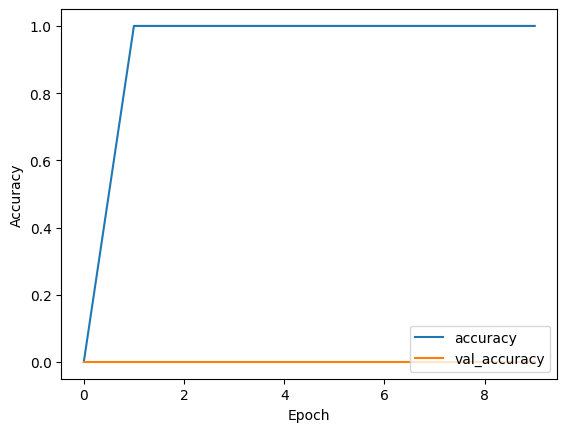

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 1.5169
Test accuracy: 0.0


In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Evaluasi di test data
test_loss, test_acc = model.evaluate(videos_test, labels_test)
print(f'Test accuracy: {test_acc}')
